In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
yf.__version__

'0.2.54'

In [14]:
# Define stock symbol and time period
ticker = "ET"  # Apple Inc.
start_date = "2024-10-01"
# end_date = "2025-03-12"

# Download data
df = yf.download(ticker, start=start_date)
df["MA100d"] = df["Close"].rolling(window=100).mean()


# Display first few rows
df.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,MA100d
Ticker,ET,ET,ET,ET,ET,
Date,,,,,,
2024-10-01,15.549197,15.607144,15.404328,15.433302,9757300,NaN
2024-10-02,15.500906,15.636118,15.404328,15.607143,12220700,NaN
2024-10-03,15.752012,15.790645,15.433302,15.529881,15926000,NaN
2024-10-04,15.742353,15.877565,15.713381,15.771328,10448900,NaN
2024-10-07,15.665091,15.809960,15.655432,15.742354,6609200,NaN


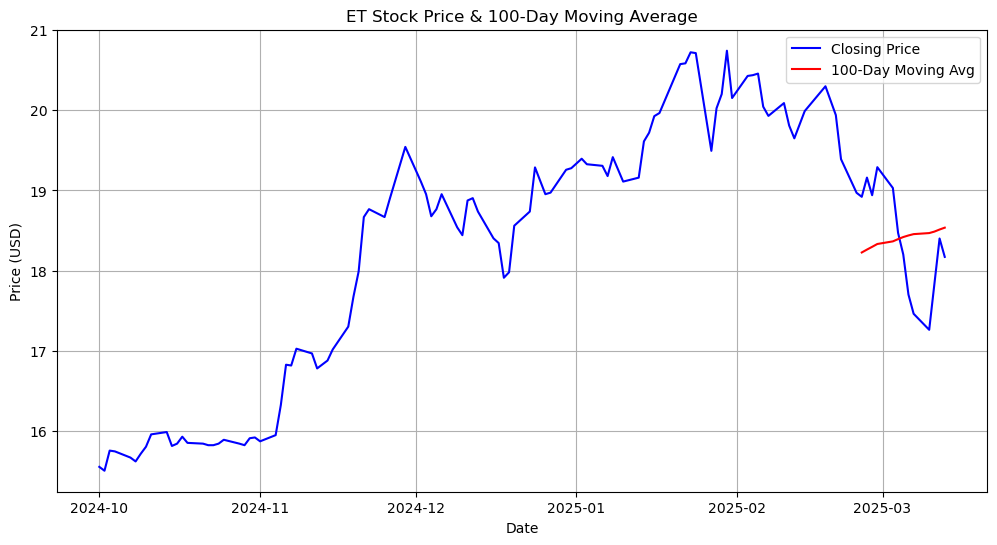

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df["Close"], label="Closing Price", color="blue")
plt.plot(df.index, df["MA100d"], label="100-Day Moving Avg", color="red")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title(f"{ticker} Stock Price & 100-Day Moving Average")
plt.legend()
plt.grid()
plt.show()


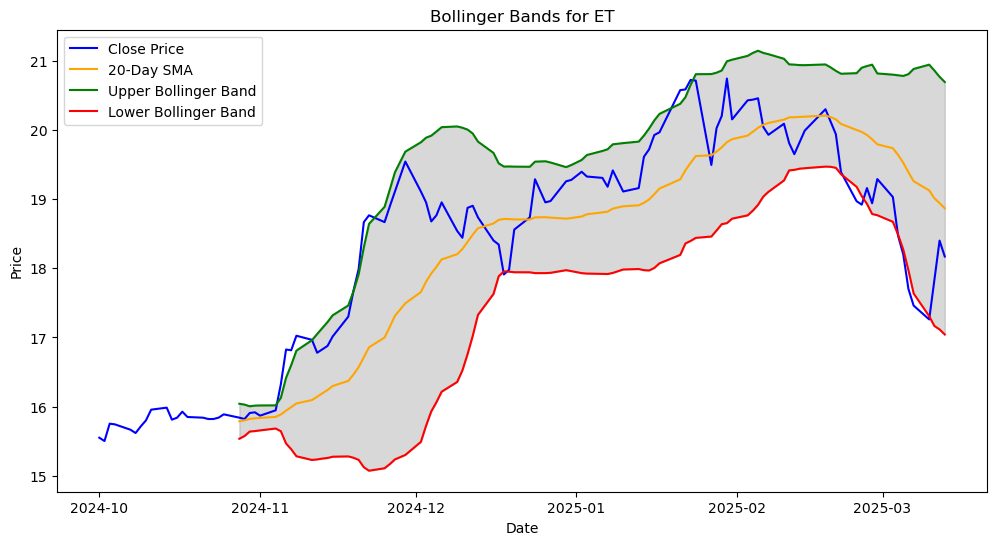

In [16]:
# Download stock data
# ticker = 'AAPL'  # Use any stock symbol you want
# data = yf.download(ticker, start="2023-01-01", end="2024-01-01")

# Calculate the moving average and standard deviation
df['SMA'] = df['Close'].rolling(window=20).mean()  # 20-day SMA
df['STD'] = df['Close'].rolling(window=20).std()   # 20-day standard deviation

# Calculate the Bollinger Bands
df['Upper Band'] = df['SMA'] + (df['STD'] * 2)
df['Lower Band'] = df['SMA'] - (df['STD'] * 2)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['SMA'], label='20-Day SMA', color='orange')
plt.plot(df['Upper Band'], label='Upper Bollinger Band', color='green')
plt.plot(df['Lower Band'], label='Lower Bollinger Band', color='red')
plt.fill_between(df.index, df['Upper Band'], df['Lower Band'], color='grey', alpha=0.3)
plt.title(f'Bollinger Bands for {ticker}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()